In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Research Question 1
### What is the number and proportion of GitHub repositories that are using GitHub Actions workflows, categorized by their main programming language?

In [119]:
## The first dataset we will use contains information about GitHub repositories that make use of GitHub Actions workflows.

df_repositories = pd.read_csv('../datasets/repositories.csv')
df_repositories

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


### Requirements : 
#### 1-First, preprocess the dataset by filtering on repositories with at least 100 stars AND more than 1 contributors
#### 2-Quantify the number of repositories, grouped by language
    Hint: Use the groupby operation from pandas. See https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#### 3-Quantify the proportion of repositories per language
    Hint: proportion per langage = number of repositories per language / total number of repositories

In [120]:
#filtering on repositories with at least 100 stars AND more than 1 contributors
df_repositories = df_repositories[(df_repositories['stars'] >= 100) & (df_repositories['contributors'] > 1)]
df_repositories

,repository,branch,language,created,updated,commit,stars,watchers,forks,size,branches,commits,contributors,issues,prs
0,00-evan/shattered-pixel-dungeon,master,Java,2014-07-31 21:56:31,2022-01-13 23:41:31,5d1a2dce6b554b40f6737ead45d411fd98f4c67d,1803,83,580,69470,1,5165,2.0,859.0,33.0
1,0015/ideasnprojects,master,C++,2019-07-04 08:16:56,2021-03-10 05:31:05,bd09568e05e2790ce3f72905995e763600ff3903,332,39,253,1315,1,144,2.0,11.0,7.0
2,0015/thatproject,master,C,2019-07-04 08:16:56,2021-12-16 20:49:19,69c85b76c285e9b532b2237fbd4244fd6e7e7820,629,68,447,2160,5,208,2.0,0.0,13.0
3,007gzs/dingtalk-sdk,master,Python,2018-05-07 09:42:31,2021-06-03 12:49:51,7979da2e259fdbc571728cae2425a04dbc65850a,148,14,48,944,1,131,7.0,38.0,13.0
4,007gzs/meeting,master,Python,2019-07-02 09:14:00,2021-04-13 05:49:08,a1bea997e2849c03e2a3cfa724d036b6769e1abb,167,6,61,1051,2,104,2.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69142,zzzprojects/sqlfiddle,master,JavaScript,2012-01-18 08:25:59,2021-04-12 19:20:03,b0014899c1701e017bd87f826e8e369d163ef574,272,29,53,18666,9,530,3.0,76.0,4.0
69143,zzzprojects/sqlfiddle2,master,JavaScript,2014-04-20 22:44:28,2021-04-12 19:20:50,eb6694a8d8f4fcdda82b88bb0f426eb978c304e5,192,17,39,2035,2,192,2.0,32.0,3.0
69144,zzzprojects/sqlfiddle3,master,JavaScript,2016-12-26 19:27:27,2021-04-12 19:27:04,d4283d80b161ede014e49ee177e7d98098f6d583,245,16,44,1717,2,196,3.0,13.0,6.0
69145,zzzprojects/z.extensionmethods,master,C#,2015-03-03 14:49:23,2021-04-06 14:42:44,bdbec3f0924a01e9f638f1ec3c975bd9ff13beb0,844,95,214,6590,1,127,3.0,19.0,14.0


In [121]:
#Quantify the number of repositories, grouped by language
df = pd.DataFrame(df_repositories.groupby('language').size())
df.columns = ['count']
df

,count
language,
C,4092
C#,3407
C++,5385
Go,4842
Java,5720
JavaScript,13062
Kotlin,1038
Objective-C,631
PHP,3915


In [122]:
df_repositories.shape[0]

66069

In [123]:
#Quantify the proportion of repositories per language and put them into the df dataframe
df['proportion'] = df['count'] / sum(df['count'])
df

,count,proportion
language,,
C,4092,0.061935
C#,3407,0.051567
C++,5385,0.081506
Go,4842,0.073287
Java,5720,0.086576
JavaScript,13062,0.197702
Kotlin,1038,0.015711
Objective-C,631,0.009551
PHP,3915,0.059256


## Research Question 2
### What are the top 10 most frequent events that trigger workflows, and what is the proportion of workflows using them?

In [124]:
## The second dataset we will use contains information about GitHub workflows, each reposity may define one or more workflows.

df_workflows = pd.read_csv('../datasets/workflows.csv')
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,"push, pull_request",2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,"push, pull_request",1
3,07akioni/css-render,nodejs.yml,Node.js CI,"push, pull_request",1
4,0b01001001/spectree,pythonpackage.yml,Python package,"pull_request, push",2
...,...,...,...,...,...
70273,zzzeek/alembic,run-on-pr.yaml,Run tests on a pr,pull_request,2
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3


### Requirements : 
#### 1-Split the events column (containig the triggers) and explode it 
    Hint: For the split function, see https://www.geeksforgeeks.org/python-string-split/
    For the explode function, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html
#### 2-Quantify the number of workflows grouped by event
#### 3-Quantify the proportion of workflows grouped by event
    Hint: proportion per event = number of workflows per event / total number of workflows
#### 4-Sort all events in decreasing order of proportion
#### 5-Using the order of step 4, quantify the cumulative proportion of workflows
    Hint: The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.
    See, for example, https://www.geeksforgeeks.org/cumulative-percentage-of-a-column-in-pandas-python/

In [125]:
#Split the events column (containig the triggers) and explode it 
df_workflows['events'] = df_workflows['events'].str.split(',')
df_workflows = df_workflows.explode('events')

In [126]:
df_workflows

,repository,filename,name,events,jobs
0,0101/pipetools,tests.yml,Tests,push,2
0,0101/pipetools,tests.yml,Tests,pull_request,2
1,0101/pipetools,publish_docs.yml,Publish docs,push,1
2,05bit/peewee-async,ci.yml,CI,push,1
2,05bit/peewee-async,ci.yml,CI,pull_request,1
...,...,...,...,...,...
70274,zzzeek/sqlalchemy,run-test.yaml,Run tests,push,4
70275,zzzeek/sqlalchemy,run-on-pr.yaml,Run tests on a pr,pull_request,3
70276,zzzeek/sqlalchemy,create-wheels.yaml,Create wheel,release,3
70277,zzzm/hostsx,main.yml,Deploy,push,1


In [127]:
#show all events
df_workflows['events'].unique()

array(['push', ' pull_request', 'pull_request', ' push', 'release',
       'workflow_dispatch', ' schedule', ' workflow_dispatch', ' release',
       'issue_comment', ' pull_request_target', 'repository_dispatch',
       'issues', ' check_suite', 'schedule', 'create',
       'pull_request_target', ' repository_dispatch', 'watch', nan,
       ' issues', 'workflow_call', 'milestone', 'workflow_run',
       ' workflow_run', ' issue_comment', ' workflow_call',
       ' pull_request_review_comment', ' pull_request_review',
       'page_build', ' status', 'deployment', 'pull_request_review',
       ' create', ' delete', ' deployment', ' discussion', ' watch',
       'status', 'check_suite', 'label', 'branch_protection_rule',
       'delete', 'discussion', 'deployment_status', ' milestone',
       ' project_card', 'check_run', ' paths', 'gollum',
       'pull_request_review_comment', 'discussion_comment', ' types',
       'project_card', ' deployment_status', ' fork', ' gollum', ' label',
   

In [128]:
#Quantify the number of workflows grouped by event
df = pd.DataFrame(df_workflows.groupby('events').size())
df.columns = ['count']
df

,count
events,
check_run,8
check_suite,24
create,127
delete,37
deployment,5
...,...
status,30
watch,17
workflow_call,83


In [129]:
#Quantify the proportion of workflows grouped by event and put them into the df dataframe
df['proportion'] = df['count'] / sum(df['count'])
df

,count,proportion
events,,
check_run,8,0.000066
check_suite,24,0.000197
create,127,0.001045
delete,37,0.000304
deployment,5,0.000041
...,...,...
status,30,0.000247
watch,17,0.000140
workflow_call,83,0.000683


In [130]:
#Sort all events in decreasing order of proportion
df.sort_values(by='proportion', ascending=False)

,count,proportion
events,,
push,45727,0.376239
pull_request,31542,0.259526
pull_request,9662,0.079498
schedule,6098,0.050174
workflow_dispatch,5501,0.045262
...,...,...
project_column,2,0.000016
public,2,0.000016
registry_package,2,0.000016


In [131]:
df_workflows.groupby('events').size().cumsum()

events
 check_run                8
 check_suite             32
 create                 159
 delete                 196
 deployment             201
                      ...  
status               116474
watch                116491
workflow_call        116574
workflow_dispatch    121122
workflow_run         121537
Length: 63, dtype: int64

In [132]:
#quantify the cumulative proportion of workflows (cumulative : The cumulative proportion is calculated by dividing the cumulative frequency by the total frequency.) and put them into the df dataframe
df['cumulative_proportion'] = df_workflows.groupby('events').size().cumsum() / sum(df['count'])
df.sort_values(by='proportion', ascending=False)
df

,count,proportion,cumulative_proportion
events,,,
check_run,8,0.000066,0.000066
check_suite,24,0.000197,0.000263
create,127,0.001045,0.001308
delete,37,0.000304,0.001613
deployment,5,0.000041,0.001654
...,...,...,...
status,30,0.000247,0.958342
watch,17,0.000140,0.958482
workflow_call,83,0.000683,0.959165


## Research Question 3

The GitHub Actions marketplace classifies all published actions in a predefined set of categories (e.g., api-management, continuous-integration, publishing, utilities)
Each action has a required primary category and an optional secondary category.

### What is the number and proportion of GitHub Actions that can be found in each category?

In [133]:
## The third dataset we will use contains information about GitHub Actions that are published in GitHub marketplace.

df_actions = (
    pd.read_csv('../datasets/actions.csv')
    .assign(category=lambda d:d.apply(lambda s: eval(s.categories), axis=1))
    [['actions','category','stars','open_issues','pull_requests']]
)
df_actions

,actions,category,stars,open_issues,pull_requests
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0
...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0


### Requirements : 
#### 1-Create a new column that contains the primary category of the action
#### 2-Quantify the number of actions grouped by primary category
#### 3-Quantify the proportion of action grouped by primary category
#### 4-Visualise this proportion by means of a pie chart showing the 5 most frequent categories and collapsing all other categories into "others".
    Hint: For information about pie charts, see https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html and https://stackoverflow.com/questions/48587997/matplotlib-pie-graph-with-all-other-categories

In [134]:
#Create a new column primary category
df_actions['primary_category'] = None
df_actions

,actions,category,stars,open_issues,pull_requests,primary_category
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,None
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,None
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,None
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,None
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,None
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,None
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,None
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,None
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,None


In [135]:
for i in range(len(df_actions)):
    df_actions['primary_category'][i] = df_actions['category'][i][0]
df_actions

C:\Users\cleme\AppData\Local\Temp\ipykernel_26620\1187719722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actions['primary_category'][i] = df_actions['category'][i][0]


,actions,category,stars,open_issues,pull_requests,primary_category
0,protontypes/continuous-reforestation,"[api-management, community]",168.0,4,0.0,api-management
1,phillipdupuis/pydantic-to-typescript,"[dependency-management, api-management]",157.0,8,4.0,dependency-management
2,joelwmale/webhook-action,"[monitoring, api-management]",115.0,1,6.0,monitoring
3,getsentry/action-github-app-token,[api-management],111.0,3,5.0,api-management
4,louisbrunner/checks-action,"[api-management, reporting]",96.0,3,1.0,api-management
...,...,...,...,...,...,...
9126,siacodelabs/download-from-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9127,siacodelabs/upload-to-skynet,[backup-utilities],1.0,1,0.0,backup-utilities
9128,zcong1993/actions-git-mirror,"[utilities, backup-utilities]",0.0,0,0.0,utilities
9129,olizilla/add-to-estuary,"[publishing, backup-utilities]",1.0,0,0.0,publishing


In [136]:
#Quantify the number of actions grouped by primary category decreasing order
df_actions.groupby('primary_category').size().sort_values(ascending=False)

primary_category
continuous-integration    2375
deployment                1138
project-management         783
code-review                765
security                   595
publishing                 468
code-quality               451
dependency-management      391
testing                    343
utilities                  273
container-ci               268
chat                       256
monitoring                 191
support                    162
api-management             161
reporting                   80
learning                    74
mobile                      68
localization                55
mobile-ci                   46
open-source-management      44
time-tracking               37
ides                        30
backup-utilities            21
game-ci                     19
desktop-tools               18
code-search                 10
code-scanning-ready          5
ai-assisted                  3
community                    1
dtype: int64

In [137]:
#Quantify the proportion of action grouped by primary category sorted in decreasing order
df_actions.groupby('primary_category').size().sort_values(ascending=False) / df_actions.shape[0] * 100

primary_category
continuous-integration    26.010295
deployment                12.463038
project-management         8.575183
code-review                8.378053
security                   6.516263
publishing                 5.125397
code-quality               4.939218
dependency-management      4.282116
testing                    3.756434
utilities                  2.989815
container-ci               2.935056
chat                       2.803636
monitoring                 2.091775
support                    1.774176
api-management             1.763224
reporting                  0.876136
learning                   0.810426
mobile                     0.744716
localization               0.602344
mobile-ci                  0.503778
open-source-management     0.481875
time-tracking              0.405213
ides                       0.328551
backup-utilities           0.229986
game-ci                    0.208082
desktop-tools              0.197131
code-search                0.109517
code-scanni

([<matplotlib.patches.Wedge at 0x23d07ea28f0>,
 [Text(0.7527424884535372, 0.8021089365396552, 'continuous-integration'),
  Text(-0.4834248150024814, 0.9880791710383419, 'deployment'),
  Text(-0.9881622339264826, 0.4832550045694546, 'project-management'),
  Text(-1.0966762902077163, -0.08544655930018939, 'code-review'),
  Text(-0.9402544406565712, -0.5708954254726506, 'security'),
  Text(0.4030994137801438, -1.0234797812414784, 'other')],
 [Text(0.4105868118837475, 0.43751396538526643, '26.0%'),
  Text(-0.26368626272862616, 0.5389522751118228, '12.5%'),
  Text(-0.5389975821417177, 0.2635936388560661, '8.6%'),
  Text(-0.598187067386027, -0.04660721416373967, '8.4%'),
  Text(-0.5128660585399478, -0.3113975048032639, '6.5%'),
  Text(0.21987240751644208, -0.5582616988589882, '38.1%')])

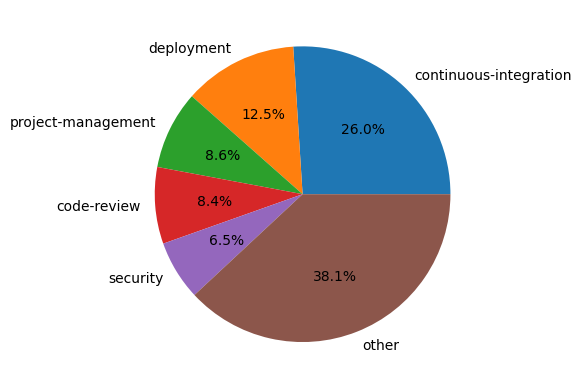

In [138]:
#get the 5 most frequent categories
freq_categories = df_actions.groupby('primary_category').size().sort_values(ascending=False).head(5).index

#get the proportion of actions in the 5 most frequent categories
prop_actions = {}
for cat in freq_categories:
    prop_actions[cat] = df_actions[df_actions['primary_category'] == cat].shape[0] / df_actions.shape[0] * 100

prop_actions["other"] = 100 - sum(prop_actions.values())

#plot the proportion of actions in the 5 most frequent categories
plt.pie(prop_actions.values(), labels=prop_actions.keys(), autopct='%1.1f%%')